<a href="https://colab.research.google.com/github/AmberFu/42_Rush_Numpy/blob/master/Copy_of_RUSH_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: pfu

## Part I 

1. Create a matrix of random values of a distribution of your choice.

2. Create a 1-dimensional array of **12 sequential numbers** and convert it to a 4x3 array.

3. Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.

4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

5. Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. 
Plot the matrix with matplotlib’s imshow

6. . Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.


In [0]:
import numpy as np

np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

## 1. Create a matrix of random values of a distribution of your choice.
### np.random.rand(row, column)

In [0]:
np.random.rand(3,2)

array([[0.44403808, 0.12587839],
       [0.23303891, 0.35714615],
       [0.08379449, 0.47208528]])

## 2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [0]:
arr_1d = np.arange(12)
arr_2d = np.reshape(arr_1d, (4,3))
arr_2d

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## 3. Write a function that creates an incremental N-dimensional (nd) array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify

At first, I think about **[numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)** to generate array in specific range.
But I find describtion suggest that: 

> When using a non-integer step, such as 0.1, the results will often not be  onsistent. 
>
> It is better to use **[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace)** for these cases.
>


In [0]:
def nd_arr_from0to1(n):
    return np.full((1,n), np.linspace(0,1, n))

print(nd_arr_from0to1(6))
nd_arr_from0to1(6).shape

[[0.  0.2 0.4 0.6 0.8 1. ]]


(1, 6)

## 4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [0]:
np.random.rand(10,12)[0:4, 8:12]

array([[0.48629313, 0.52118311, 0.88795538, 0.48535373],
       [0.60528725, 0.14375891, 0.31900284, 0.72454659],
       [0.36500113, 0.59671484, 0.61511511, 0.05689168],
       [0.054614  , 0.47857469, 0.37597441, 0.78601518]])

## 5. Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. => np.concatenate() Plot the matrix with matplotlib’s imshow 
### => https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html

[[0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]
 [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]
 [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]
 ...
 [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]
 [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]
 [0.         0.00200401 0.00400802 ... 0.99599198 0.99799599 1.        ]]


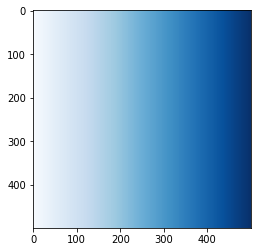

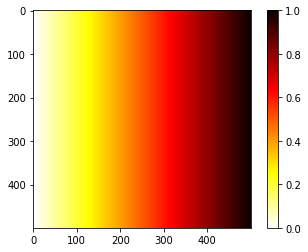

In [0]:
import matplotlib.pyplot as plt

def q5_mxn(m, n):
    ans = nd_arr_from0to1(n)
    i = 1
    while i < m:
        ans = np.concatenate((ans, nd_arr_from0to1(n)),axis = 0)
        i += 1
    return ans

data = q5_mxn(500,500)
print(data)
# type(data)
# data

# Easy one:
plt.imshow(data, cmap = 'Blues')

# Basic one:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap=plt.get_cmap('hot_r'), vmin=0, vmax=1)
fig.colorbar(im)
plt.show()

In [0]:
# Understand np.concatenate():
np.concatenate((nd_arr_from0to1(3), nd_arr_from0to1(3)),axis = 0)

array([[0.86777159, 0.42729581, 0.15987081],
       [0.7961385 , 0.23684145, 0.87099669]])

## 6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.

In [0]:
import matplotlib.pyplot as plt

def q6_mxn(m, n, k):
    ans = q5_mxn(m,n)
    i = 1
    while i < m:
        ans = np.concatenate((ans, q5_mxn(m,n)),axis = 0)
        i += 1
    return ans

dataq6 = q6_mxn(50,50,5)

In [0]:
fig, ax = plt.subplots()
im = ax.imshow(dataq6, cmap=plt.get_cmap('hot_r'), vmin=0, vmax=1)
fig.colorbar(im)
plt.show()

-------

# Part II

In [0]:
%matplotlib inline
from skimage import io # For URL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

url = 'https://38oaizxk9r32v4vd3id0mm1a-wpengine.netdna-ssl.com/wp-content/uploads/2018/06/orange-cat-names-768x432.jpg'
img = io.imread(url)
# img = mpimg.imread('/home/pyfu/Downloads/python_icon.png')
print(img)

[[[ 22  24  21]
  [ 22  24  21]
  [ 22  24  21]
  ...
  [ 75  72  67]
  [ 76  73  68]
  [ 73  72  68]]

 [[ 22  24  21]
  [ 22  24  21]
  [ 22  24  21]
  ...
  [ 73  70  65]
  [ 74  71  66]
  [ 71  70  66]]

 [[ 22  24  21]
  [ 22  24  21]
  [ 22  24  21]
  ...
  [ 71  68  63]
  [ 72  69  64]
  [ 70  67  62]]

 ...

 [[202 197 191]
  [202 197 191]
  [202 197 191]
  ...
  [172 158 145]
  [174 160 147]
  [175 161 148]]

 [[201 196 190]
  [201 196 190]
  [201 196 190]
  ...
  [171 157 144]
  [173 159 146]
  [174 160 147]]

 [[200 195 189]
  [200 195 189]
  [200 195 189]
  ...
  [170 156 143]
  [172 158 145]
  [173 159 146]]]


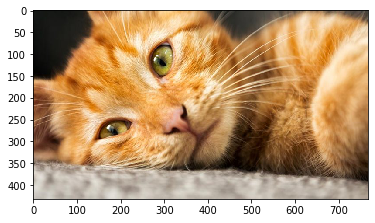

In [0]:
imgplot = plt.imshow(img)

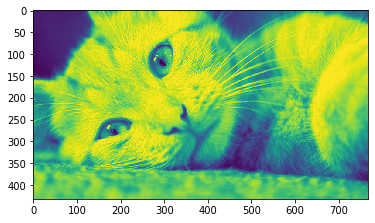

In [0]:
lum_img = img[:, :, 0]

# This is array slicing.  You can read more in the `Numpy tutorial
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.

plt.imshow(lum_img)

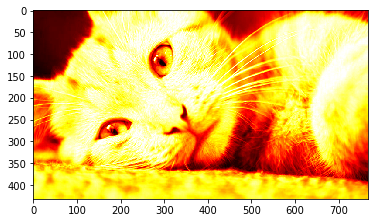

In [0]:
plt.imshow(lum_img, cmap="hot")

------------------

## Part II. Filters

> Image editing / processing is done by changing the values of the matrix pixel by pixel).
>
> In this section you will code FOUR (non-grayscale) commonly used image filters